In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ## importing libraries

In [2]:
##import warnings
##warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('data.csv') ## reading dataset

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing data

In [5]:
df.isna().sum() ## checking null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       0 non-null      int64  
 1   diagnosis                0 non-null      object 
 2   radius_mean              0 non-null      float64
 3   texture_mean             0 non-null      float64
 4   perimeter_mean           0 non-null      float64
 5   area_mean                0 non-null      float64
 6   smoothness_mean          0 non-null      float64
 7   compactness_mean         0 non-null      float64
 8   concavity_mean           0 non-null      float64
 9   concave points_mean      0 non-null      float64
 10  symmetry_mean            0 non-null      float64
 11  fractal_dimension_mean   0 non-null      float64
 12  radius_se                0 non-null      float64
 13  texture_se               0 non-null      float64
 14  perimeter_se             0 non-null   

In [7]:
df.diagnosis.unique()

array([], dtype=object)

In [35]:
df = df.drop(['id'], axis=1)

In [55]:
df = df.drop(['Unnamed: 32'], axis=1)

In [56]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Univariate analysis

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

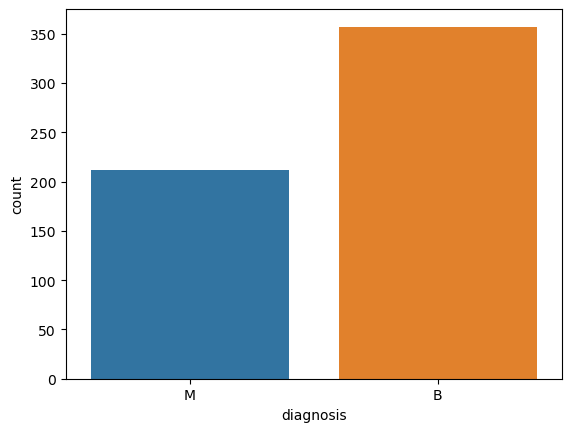

In [18]:
sns.countplot(df["diagnosis"])

In [38]:
from sklearn import preprocessing

In [39]:
label_encoder = preprocessing.LabelEncoder()

In [40]:
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

In [41]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Bivariate analysis

In [23]:
Malignant=df[df.diagnosis==1]
Benign=df[df.diagnosis==0]

In [99]:
def biplot(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
    s1=sns.barplot(ax=ax1,x=Malignant[var].value_counts().index, data=Malignant, y= 100.* Malignant[var].value_counts(normalize=True))
    ## condition is applied
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
    ## providing title and x and y axis
    ax1.set_title('Visualisation of '+ '%s' %var +' - Malignant', fontsize=17)
    ax1.set_xlabel('%s' %var,fontsize=16)
    ax1.set_ylabel("Cancer Percentage",fontsize=16) ## setting title of y-label for Malignant
    ## Bar plot
    s2=sns.barplot(ax=ax2,x=Benign[var].value_counts().index, data=Benign, y= 100.* Benign[var].value_counts(normalize=True))
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=14)
    ## setting name of axis
    ax2.set_xlabel('%s' %var, fontsize=16)
    ax2.set_ylabel("Cancer Percentage", fontsize=16) ## setting title of y-label for Benign
    ax2.set_title('Visualisation '+ '%s' %var +' - Benign', fontsize=16)
    ## Displaying plot
    plt.show()

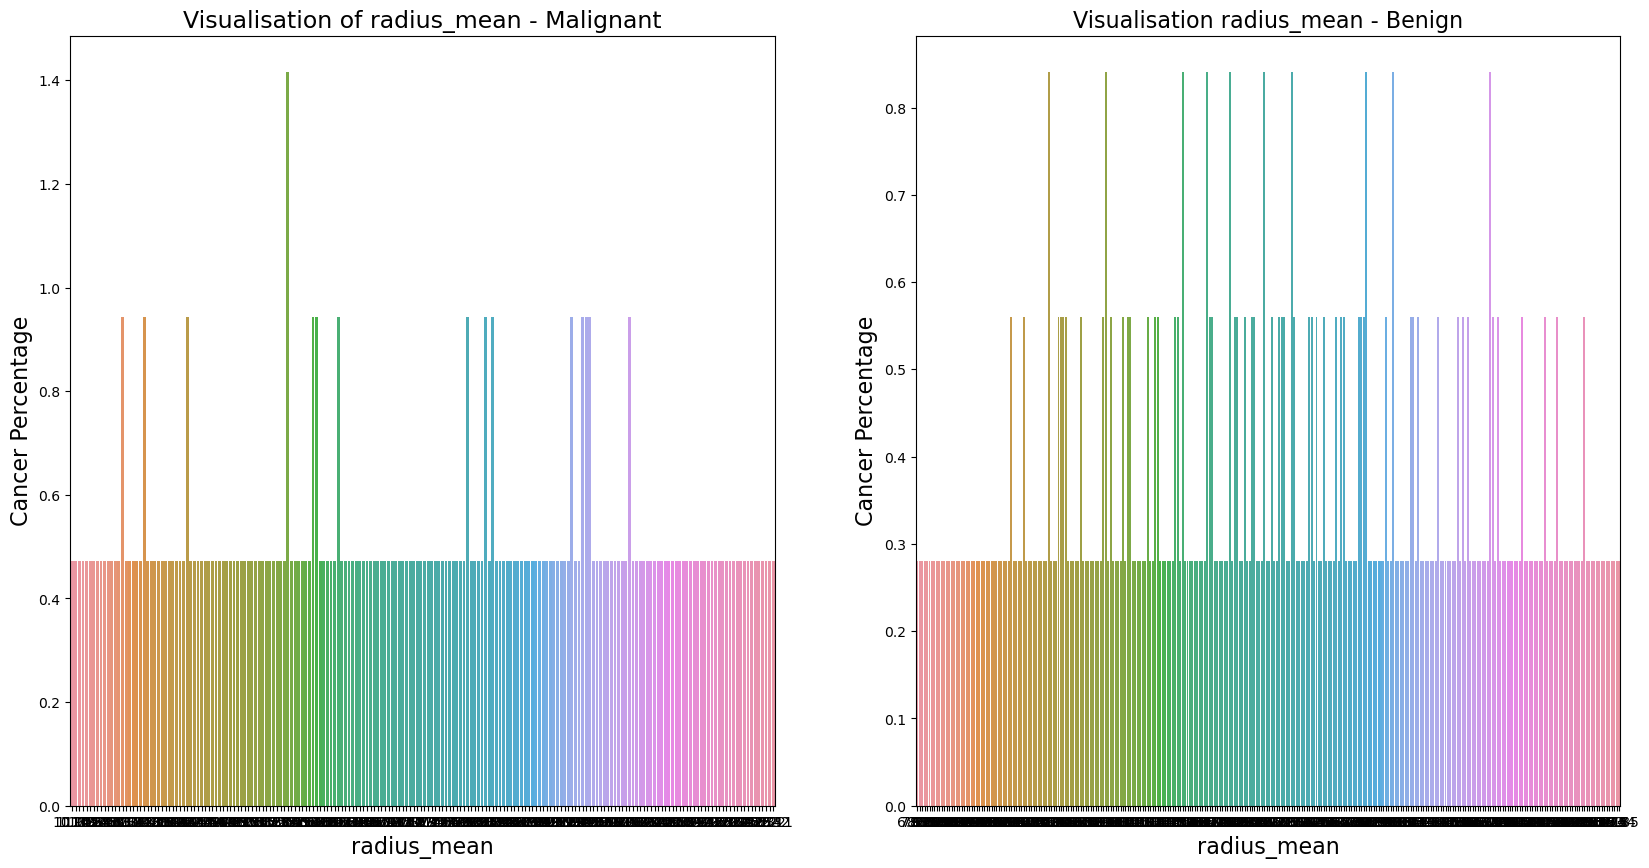

In [100]:
biplot(df, 'radius_mean',False)

In [26]:
def bivariateplots(var1,var2):
    fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(18,9))
    sns.scatterplot(ax=ax1,x=Malignant[var1],y=Malignant[var2],color='green')
    ## Title
    ax1.set_xlabel(var1)
    ax1.set_ylabel(var2)
    ax1.set_title("Malignant cancer") # setting title for malignant cancer
    ##Scatter plot
    sns.scatterplot(ax=ax2,x=Benign[var1],y=Benign[var2],color='magenta')
    ##Title
    ax2.set_xlabel(var1)
    ax2.set_ylabel(var2)
    ax2.set_title("Belign cancer") # setting title for belign cancer
    ## displaying plot
    plt.show()

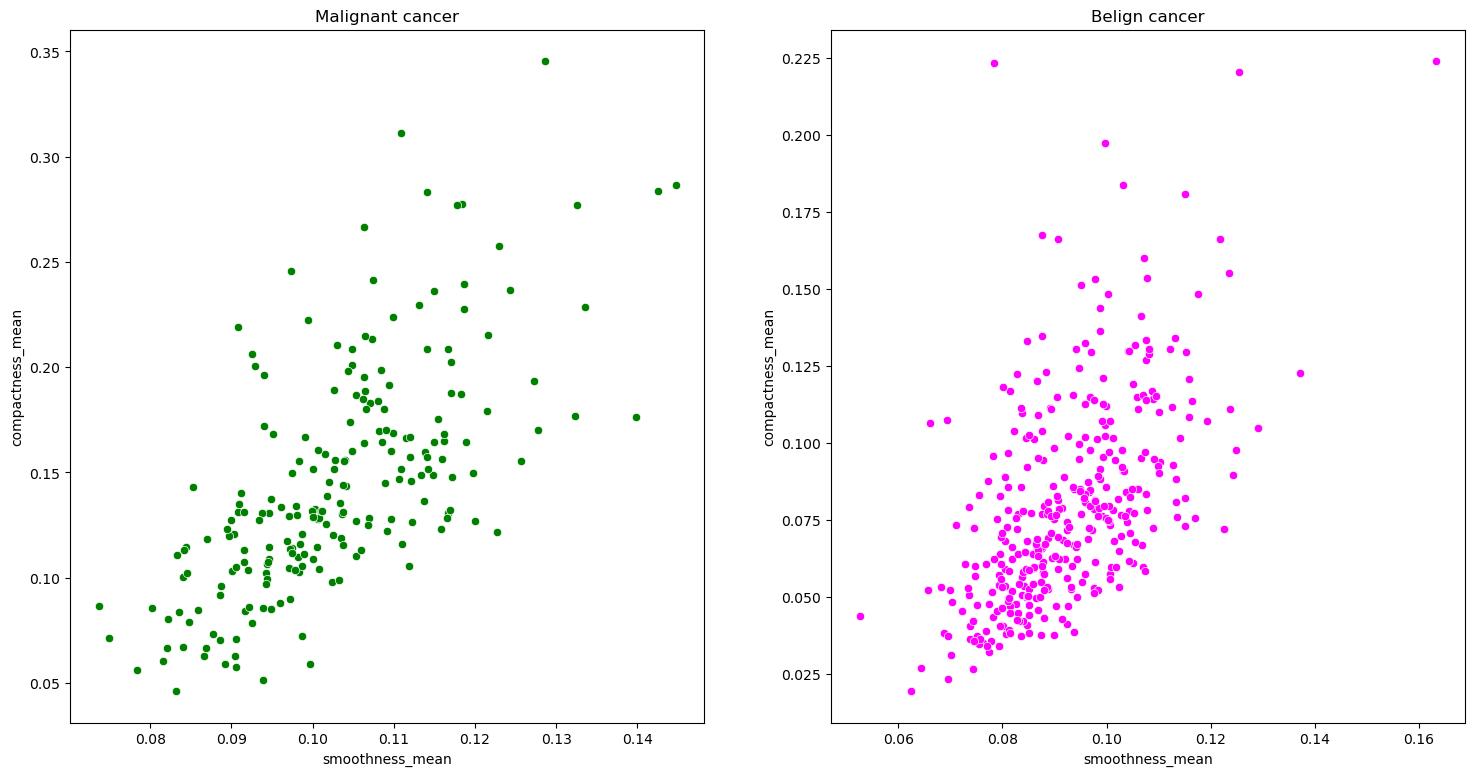

In [27]:
bivariateplots('smoothness_mean','compactness_mean')

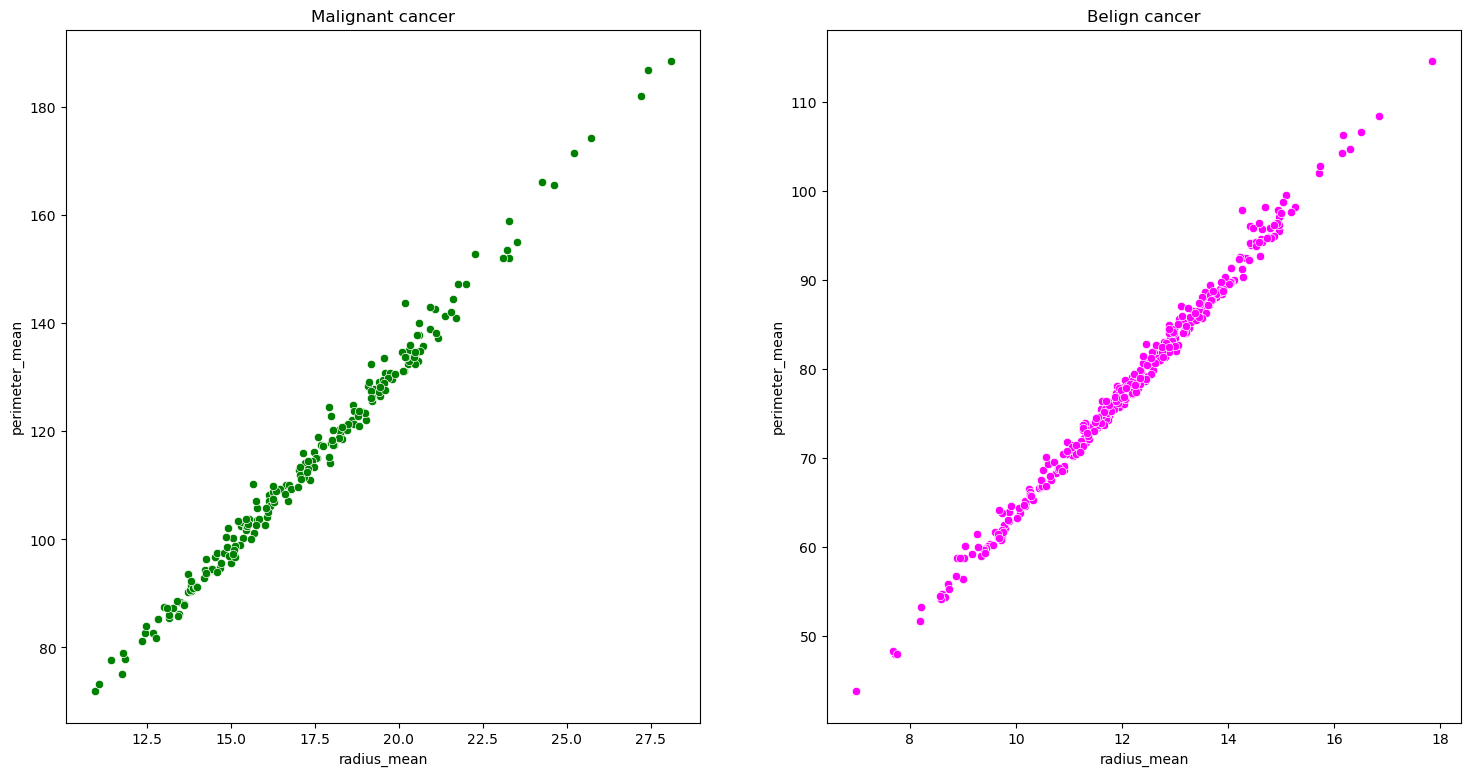

In [28]:
bivariateplots('radius_mean','perimeter_mean')

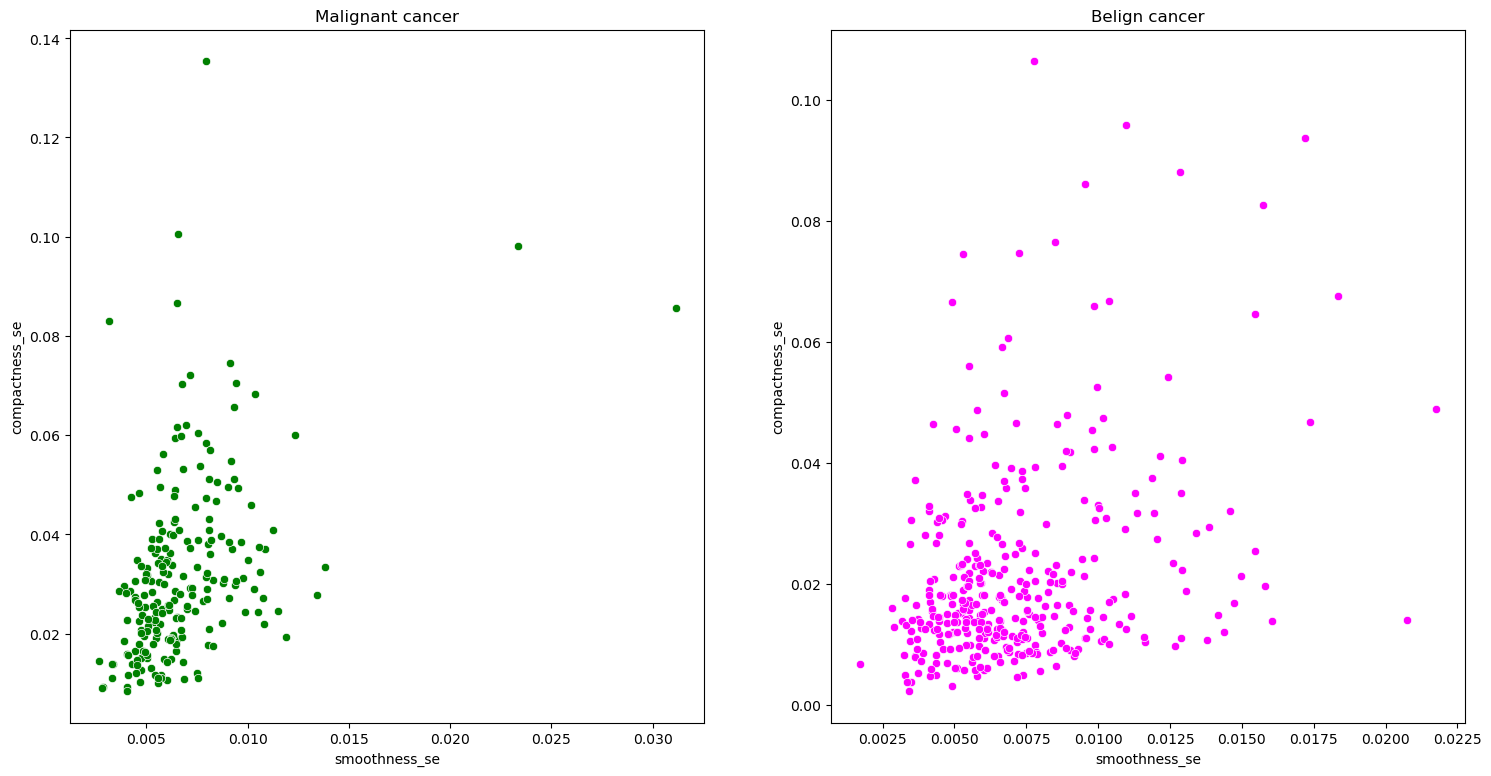

In [29]:
bivariateplots('smoothness_se','compactness_se')

## Heatmap

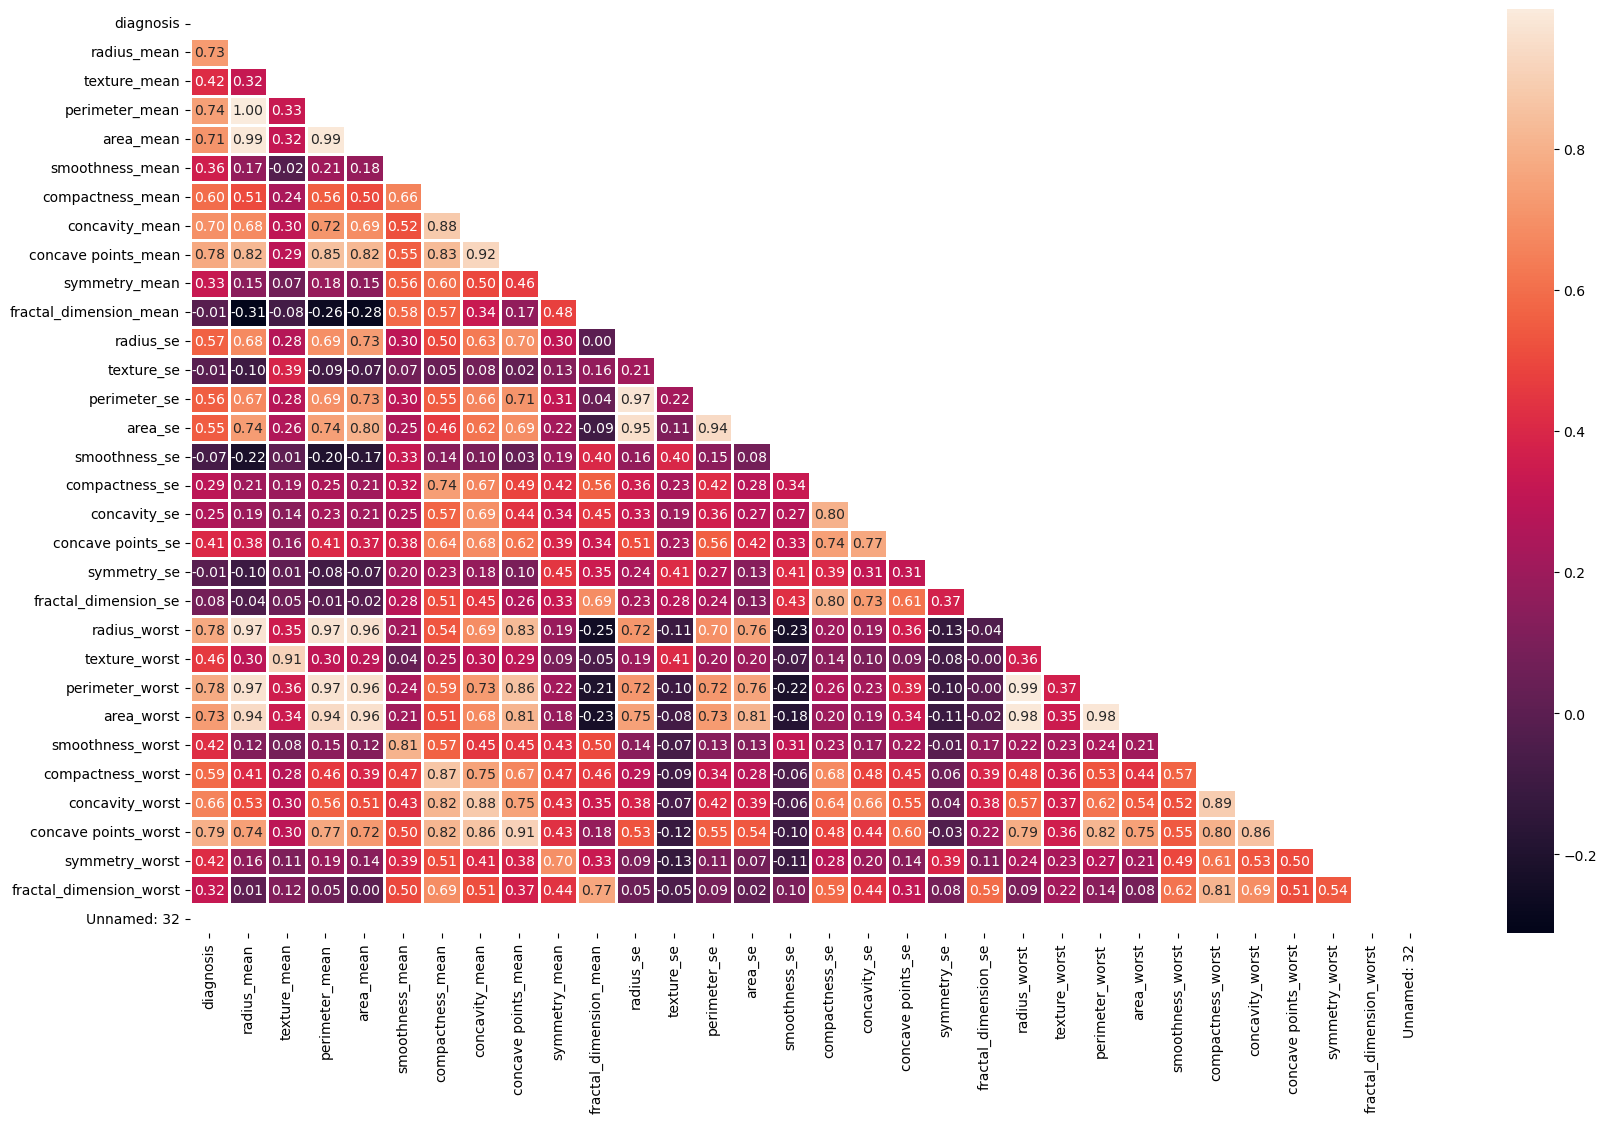

In [30]:
# heatmap 

plt.figure(figsize = (20, 12)) ## setting figure size

corr = df.corr() ## correlation
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f") ## setting heat map
plt.show() ## displaying heat map

In [57]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [58]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split ## importing train test spiltting
from sklearn.metrics import classification_report ## importing classification report

In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score # importing performance metrics
from sklearn.metrics import accuracy_score

## Training and testing data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0) # splitting dataset into 7:3 ratio

## Decision Tree Classifier 

In [69]:
from sklearn import tree
dct_clf=tree.DecisionTreeClassifier(random_state=0) ## decision tree classification is defined

In [70]:
dct_clf.fit(X_train,y_train) ## fitting the mode

DecisionTreeClassifier(random_state=0)

In [71]:
y_pred=dct_clf.predict(X_test)

In [72]:
dct_acc=accuracy_score(y_test,y_pred)
print(dct_acc)

0.9122807017543859


In [73]:
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred,
                                           average='weighted')) ## calculating precision score, f1 score, recall score

Precision Score :  0.9016265912305517
Recall Score :  0.9122807017543859
f1 Score :  0.9131201208763536


In [74]:
from sklearn.metrics import confusion_matrix ## importing confusion matrix

In [76]:
confusion_matrix(y_test, y_pred) ## displaying confusion matrix

array([[97, 11],
       [ 4, 59]], dtype=int64)

## KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()  

In [80]:
knn.fit(X_train,y_train) ## model fitting

KNeighborsClassifier()

In [81]:
y_pred=knn.predict(X_test)
knn_acc=accuracy_score(y_test,y_pred) ## predicting the model
print(knn_acc)

0.9473684210526315


In [82]:
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred,
                                           average='weighted'))  ## calculating precision score, f1 score, recall score

Precision Score :  0.9422459112149533
Recall Score :  0.9473684210526315
f1 Score :  0.9474532329725615


In [83]:
confusion_matrix(y_test, y_pred)

array([[103,   5],
       [  4,  59]], dtype=int64)

## Random Forest Classifier

In [84]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(n_estimators=50)

In [85]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [87]:
y_pred=rf_clf.predict(X_test)
rnf_acc=accuracy_score(y_test,y_pred) ## displaying accuracy score
print(rnf_acc)

0.9649122807017544


In [88]:
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred,
                                           average='weighted')) ## calculating precision score, f1 score

Precision Score :  0.9597968069666183
Recall Score :  0.9649122807017544
f1 Score :  0.9650224422036399


In [90]:
confusion_matrix(y_test, y_pred) ## Confusion matrix

array([[104,   4],
       [  2,  61]], dtype=int64)

## Naive Bayes Classifier

In [91]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [92]:
nb_clf.fit(X_train,y_train) ## fitting the model

GaussianNB()

In [94]:
y_pred=nb_clf.predict(X_test)
nb_acc=accuracy_score(y_test,y_pred) ## predicting and validating the model
print(nb_acc)

0.9239766081871345


In [95]:
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred,
                                           average='weighted'))   ## calculating precision score, f1 score, recall score

Precision Score :  0.9172751168224299
Recall Score :  0.9239766081871345
f1 Score :  0.9240991142936998


In [96]:
confusion_matrix(y_test, y_pred) ## confusion matrix

array([[101,   7],
       [  6,  57]], dtype=int64)

## Artificial Neural Network (ANN)

In [101]:
import tensorflow as tf
from tensorflow import keras

In [102]:
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'), ## adding 1st hidden layer
    keras.layers.Dense(1, activation='sigmoid')
])

In [103]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 10.6978 - accuracy: 0.6307
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 3.1313 - accuracy: 0.4899
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.8482 - accuracy: 0.7588
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8744
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9121
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9045
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9221
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9171
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9146
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9146


In [104]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

6/6 [==============================] - 0s 6ms/step - loss: 0.1822 - accuracy: 0.9357
Test loss: 0.18218471109867096
Test accuracy: 0.9356725215911865


## Model Comparison

In [106]:
comparison = pd.DataFrame({'Model': ['Decision Tree Classifier', 
                                    'KNN Classifier', 
                                  'Random Forest Classifier',
                                 'Naive Bayes Classifier',
                                    'Artificial Neural Network'], # setting all of the models
                        'Accuracy': [dct_acc*100, knn_acc*100, #selecting the accuracy rate
                                     rnf_acc*100, nb_acc*100, accuracy*100]})
comparison.sort_values(by='Accuracy', ascending=False) #comparison among the accuracy rate

,Model,Accuracy
2,Random Forest Classifier,96.491228
1,KNN Classifier,94.736842
4,Artificial Neural Network,93.567252
3,Naive Bayes Classifier,92.397661
0,Decision Tree Classifier,91.228070
